Final Project

In [ ]:
from zipfile import ZipFile

zip_file_path = "/content/heart+disease.zip"
with ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract('processed.cleveland.data', '.')

In [ ]:
df = pd.read_csv("processed.cleveland.data", header=None)
display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


Shape of dataset (before cleaning): (303, 14)

Missing values per column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Shape of dataset (after cleaning): (297, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal 

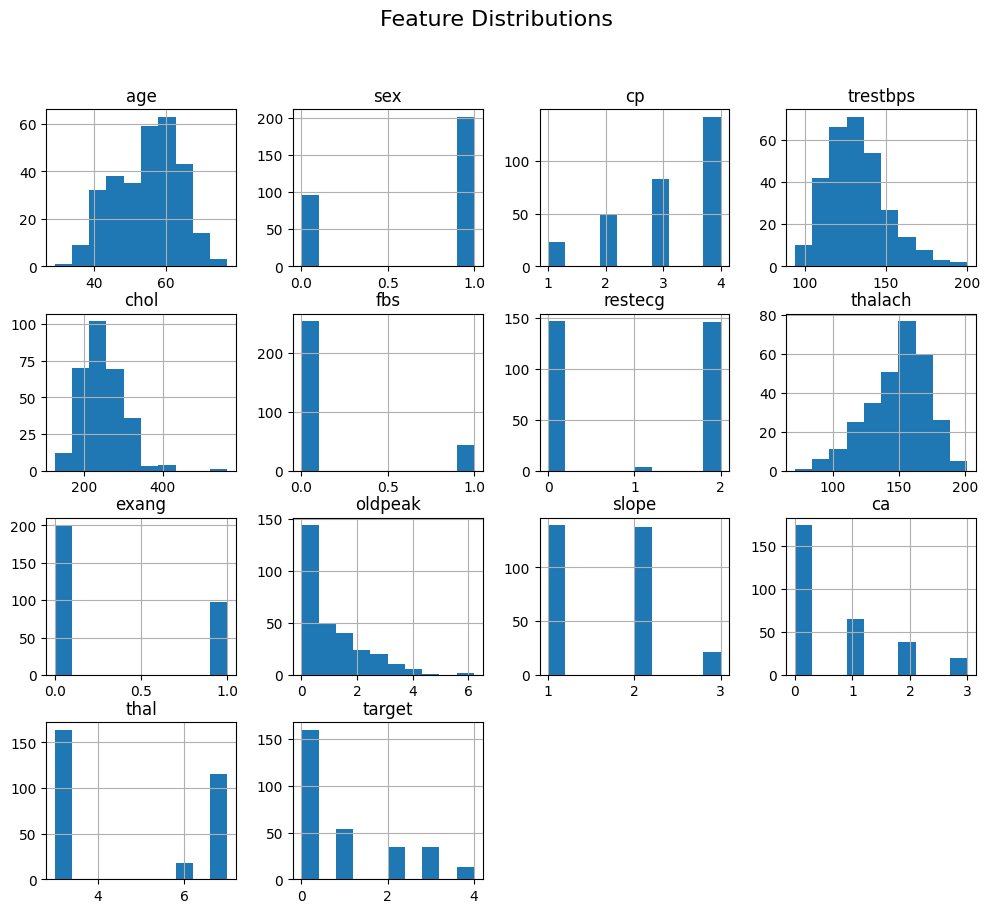

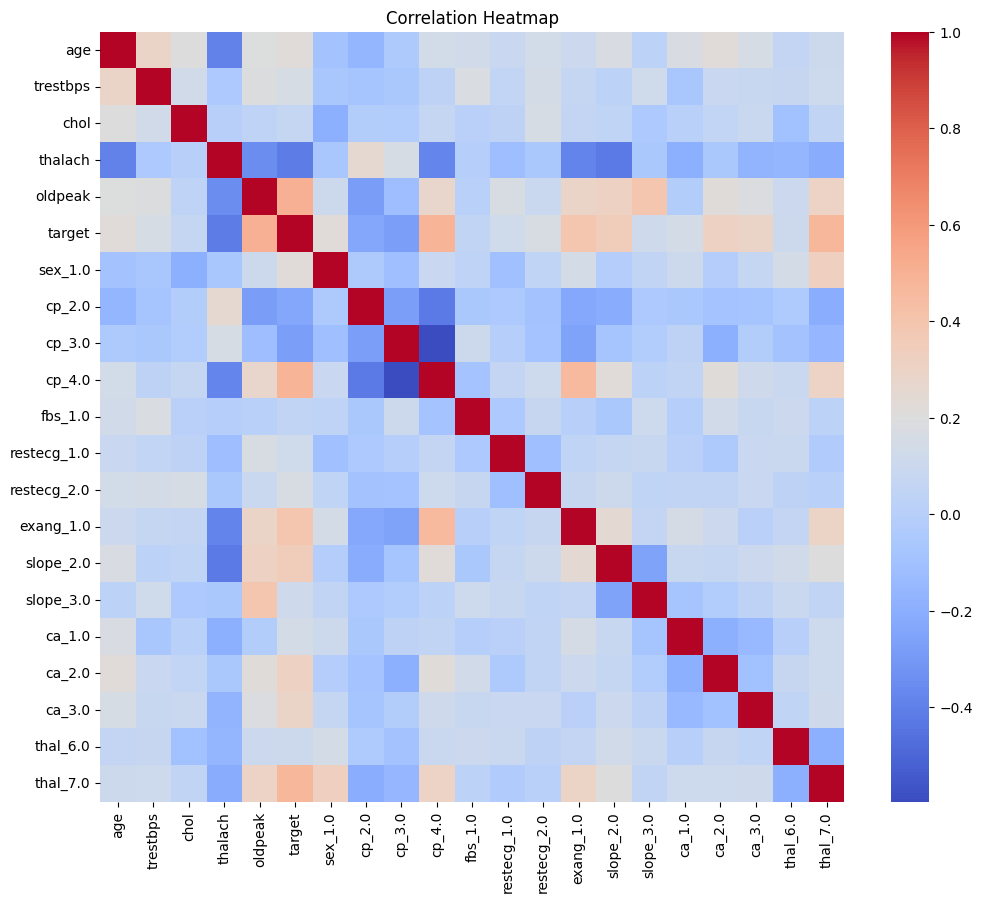

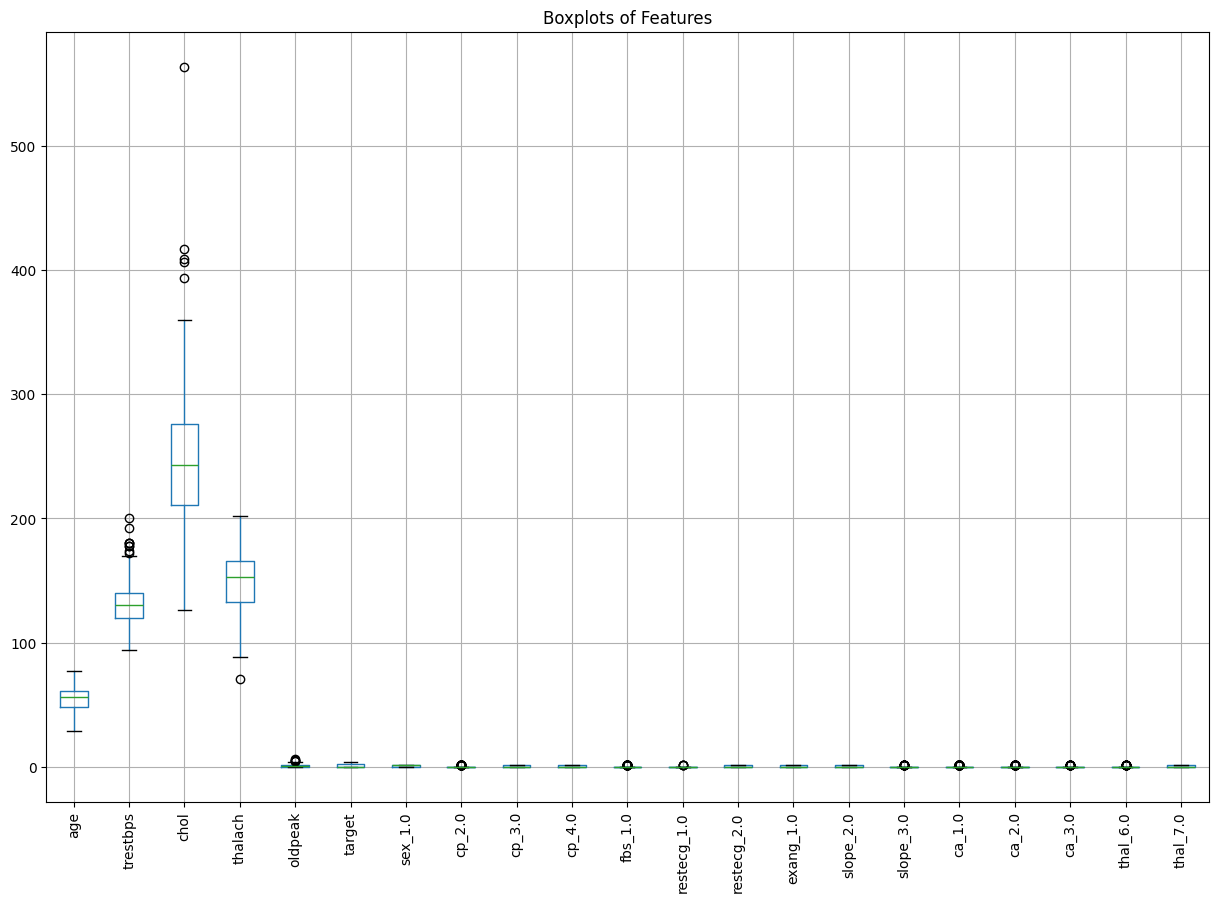

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


columns = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "target"
]


df = pd.read_csv("/content/processed.cleveland.data", header=None, names=columns)

print("Shape of dataset (before cleaning):", df.shape)
df.head()


df = df.replace("?", np.nan)


print("\nMissing values per column:")
print(df.isnull().sum())


df = df.dropna()


df = df.astype(float)

print("\nShape of dataset (after cleaning):", df.shape)


print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())


categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\nShape after encoding:", df_encoded.shape)


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)

df_scaled = pd.DataFrame(scaled_data, columns=df_encoded.columns)



df.hist(figsize=(12, 10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

plt.figure(figsize=(12,10))
sns.heatmap(df_encoded.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


plt.figure(figsize=(15, 10))
df_encoded.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots of Features")
plt.show()

Explained variance ratio per component:
 [0.18626858 0.08139371 0.07251018 0.06919957 0.06336174 0.05852182
 0.05484155 0.05305354 0.04839296 0.04185227 0.03887173 0.03757831
 0.0362355  0.03401624 0.02772416 0.02582968 0.01984237 0.01862662
 0.01441636 0.01246063 0.00500249]

Cumulative variance ratio:
 [0.18626858 0.26766228 0.34017247 0.40937203 0.47273378 0.5312556
 0.58609715 0.63915069 0.68754365 0.72939592 0.76826764 0.80584596
 0.84208145 0.87609769 0.90382185 0.92965153 0.9494939  0.96812051
 0.98253688 0.99499751 1.        ]


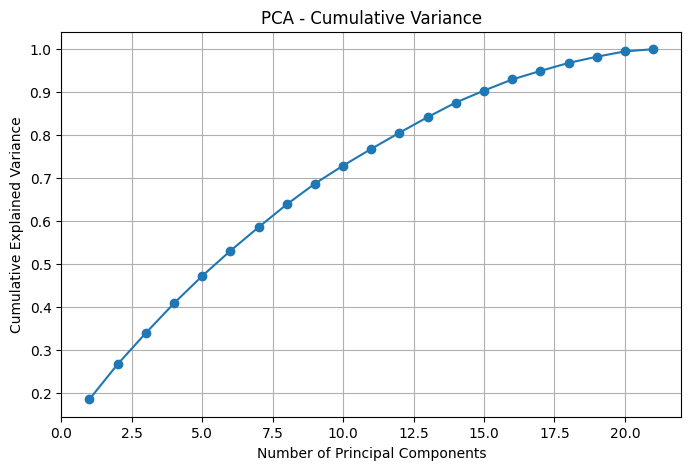

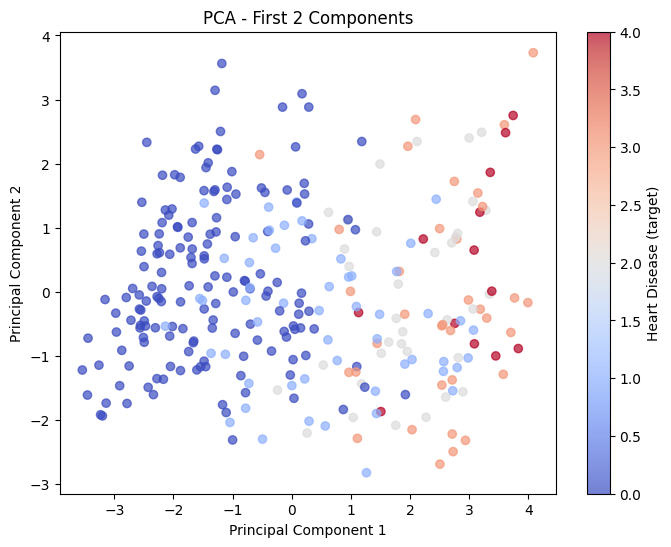

In [ ]:

from sklearn.decomposition import PCA


pca = PCA(n_components=df_scaled.shape[1])
pca_fit = pca.fit(df_scaled)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

print("Explained variance ratio per component:\n", explained_variance)
print("\nCumulative variance ratio:\n", cumulative_variance)


import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Variance")
plt.grid(True)
plt.show()


pca_2 = PCA(n_components=2)
pca_result = pca_2.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=df["target"], cmap="coolwarm", alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - First 2 Components")
plt.colorbar(label="Heart Disease (target)")
plt.show()

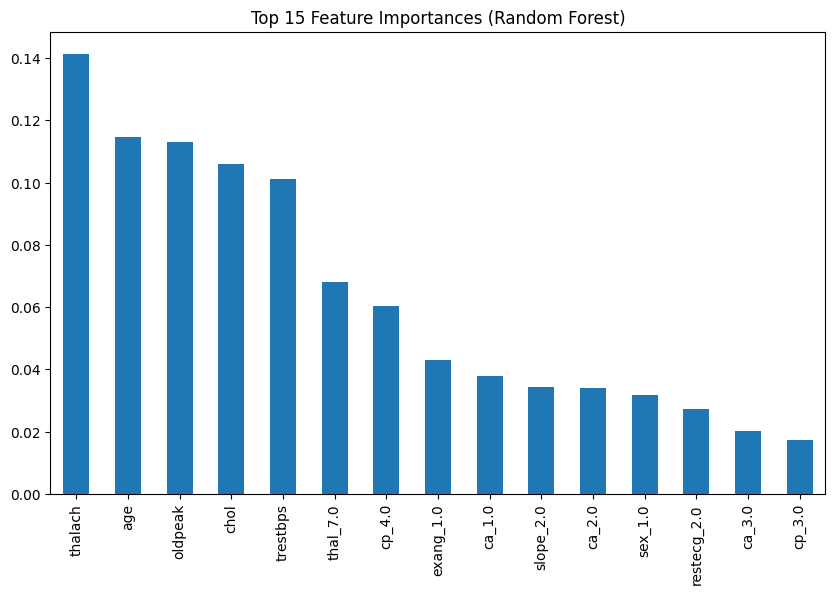

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Features by RFE:
Index(['sex_1.0', 'cp_4.0', 'fbs_1.0', 'restecg_2.0', 'slope_2.0', 'ca_1.0',
       'ca_2.0', 'ca_3.0', 'thal_6.0', 'thal_7.0'],
      dtype='object')

Top Features by Chi-Square Test:
Index(['oldpeak', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'exang_1.0', 'slope_2.0',
       'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_7.0'],
      dtype='object')

Final Selected Features for Modeling:
['ca_1.0', 'thal_6.0', 'thal_7.0', 'cp_3.0', 'oldpeak', 'sex_1.0', 'slope_2.0', 'ca_3.0', 'ca_2.0', 'cp_2.0', 'fbs_1.0', 'cp_4.0', 'exang_1.0', 'restecg_2.0']


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:

from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10,6))
feature_importance[:15].plot(kind='bar')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

print("Selected Features by RFE:")
selected_rfe = X.columns[fit.support_]
print(selected_rfe)


from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_scaled, y)

chi2_features = X.columns[chi2_selector.get_support()]
print("\nTop Features by Chi-Square Test:")
print(chi2_features)


final_features = list(set(selected_rfe).union(set(chi2_features)))
print("\nFinal Selected Features for Modeling:")
print(final_features)


Logistic Regression — Classification Report
              precision    recall  f1-score   support

           0      0.824     0.875     0.848        32
           1      0.846     0.786     0.815        28

    accuracy                          0.833        60
   macro avg      0.835     0.830     0.832        60
weighted avg      0.834     0.833     0.833        60


Decision Tree — Classification Report
              precision    recall  f1-score   support

           0      0.771     0.844     0.806        32
           1      0.800     0.714     0.755        28

    accuracy                          0.783        60
   macro avg      0.786     0.779     0.780        60
weighted avg      0.785     0.783     0.782        60


Random Forest — Classification Report
              precision    recall  f1-score   support

           0      0.794     0.844     0.818        32
           1      0.808     0.750     0.778        28

    accuracy                          0.800        60
   ma

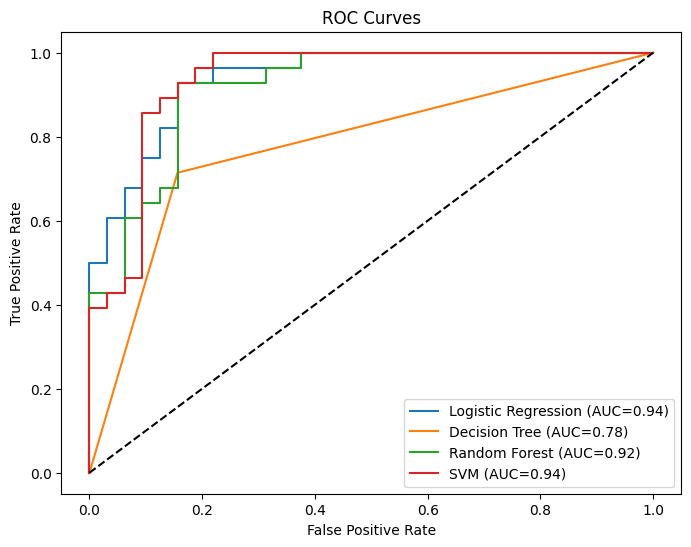

In [ ]:

df_encoded["target"] = (df_encoded["target"] > 0).astype(int)


from sklearn.model_selection import train_test_split

X = df_encoded.drop("target", axis=1)
y = df_encoded["target"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=5000, solver="lbfgs", class_weight="balanced"))
    ]),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(
        random_state=42, class_weight="balanced", n_estimators=300
    ),
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(probability=True, random_state=42, class_weight="balanced"))
    ])
}


import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, roc_curve
)
import matplotlib.pyplot as plt

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    results[name] = [acc, prec, rec, f1, auc]

    print(f"\n{name} — Classification Report")
    print(classification_report(y_test, y_pred, digits=3))


results_df = pd.DataFrame(results, index=["Accuracy","Precision","Recall","F1-Score","AUC"]).T
print("\nModel Performance Comparison:\n")
print(results_df.sort_values("AUC", ascending=False))


plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

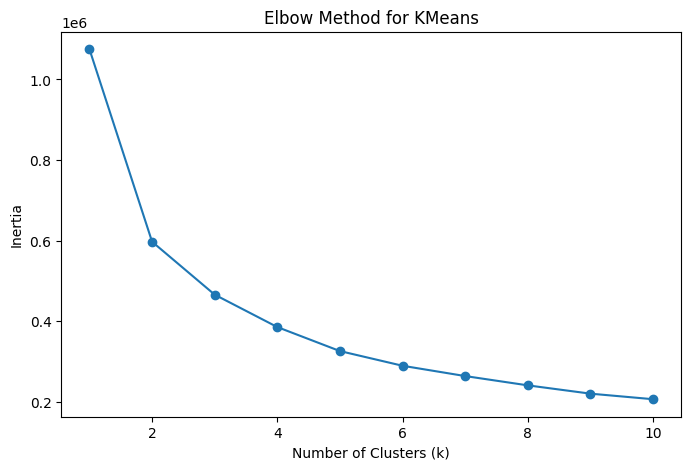

KMeans ARI: 0.019, Silhouette Score: 0.387


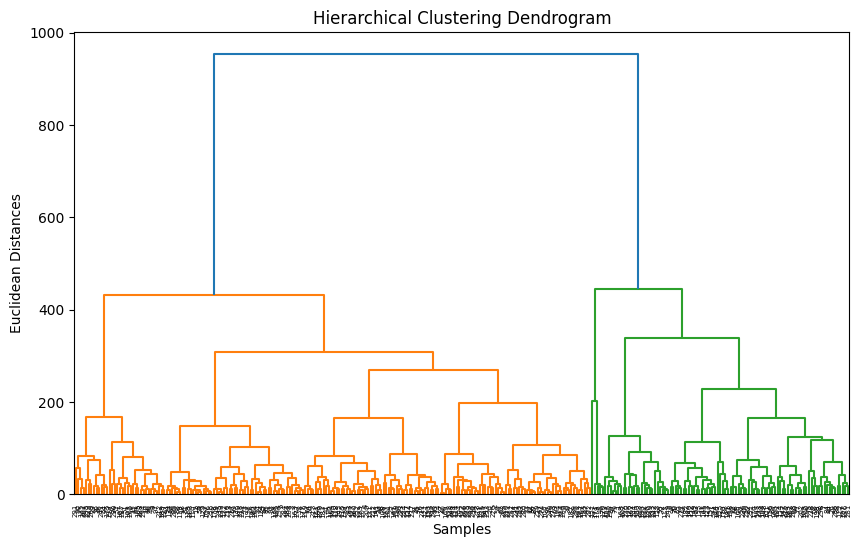

Hierarchical Clustering ARI: 0.039, Silhouette Score: 0.384


In [ ]:

from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

X_unsupervised = df_encoded.drop("target", axis=1)


inertia = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_unsupervised)
    inertia.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker="o")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()


kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_unsupervised)


ari_kmeans = adjusted_rand_score(df_encoded["target"], clusters)
silhouette_kmeans = silhouette_score(X_unsupervised, clusters)
print(f"KMeans ARI: {ari_kmeans:.3f}, Silhouette Score: {silhouette_kmeans:.3f}")


import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(X_unsupervised, method='ward'))
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distances")
plt.show()


hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(X_unsupervised)


ari_hc = adjusted_rand_score(df_encoded["target"], hc_clusters)
silhouette_hc = silhouette_score(X_unsupervised, hc_clusters)
print(f"Hierarchical Clustering ARI: {ari_hc:.3f}, Silhouette Score: {silhouette_hc:.3f}")

In [ ]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

param_grid_lr = [
    {'solver': ['lbfgs'], 'penalty': ['l2', None], 'C': [0.01, 0.1, 1, 10]},
    {'solver': ['saga'], 'penalty': ['l1', 'l2', None], 'C': [0.01, 0.1, 1, 10]},
    {'solver': ['saga'], 'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10], 'l1_ratio': [0, 0.25, 0.5, 0.75, 1]}
]

lr = LogisticRegression(max_iter=5000, class_weight="balanced")
grid_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring="f1", n_jobs=-1, error_score="raise")
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best Logistic Regression Score:", grid_lr.best_score_)


from sklearn.ensemble import RandomForestClassifier
import numpy as np

param_dist_rf = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rf = RandomForestClassifier(random_state=42, class_weight="balanced")
rand_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf,
    n_iter=20, cv=5, scoring="f1", random_state=42, n_jobs=-1
)
rand_rf.fit(X_train, y_train)

print("Best Random Forest Params:", rand_rf.best_params_)
print("Best Random Forest Score:", rand_rf.best_score_)


best_lr = grid_lr.best_estimator_
best_rf = rand_rf.best_estimator_

for model, name in [(best_lr, "Logistic Regression"), (best_rf, "Random Forest")]:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print(f"\n{name} Performance on Test Set:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-Score:", f1_score(y_test, y_pred))
    print("AUC:", roc_auc_score(y_test, y_prob))

Best Logistic Regression Params: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Logistic Regression Score: 0.8143892339544514
Best Random Forest Params: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 20, 'bootstrap': False}
Best Random Forest Score: 0.7962091132539233

Logistic Regression Performance on Test Set:
Accuracy: 0.8333333333333334
Precision: 0.8461538461538461
Recall: 0.7857142857142857
F1-Score: 0.8148148148148148
AUC: 0.9285714285714286

Random Forest Performance on Test Set:
Accuracy: 0.8
Precision: 0.8076923076923077
Recall: 0.75
F1-Score: 0.7777777777777778
AUC: 0.9107142857142857


In [ ]:

import joblib


best_model = rand_rf.best_estimator_


joblib.dump(best_model, "final_model.pkl")
print("✅ Model saved as final_model.pkl")


loaded_model = joblib.load("final_model.pkl")
y_pred_loaded = loaded_model.predict(X_test)

print("Reloaded Model Accuracy:", accuracy_score(y_test, y_pred_loaded))

✅ Model saved as final_model.pkl
Reloaded Model Accuracy: 0.8
